In [75]:
import pandas as pd

description = pd.read_excel('E Commerce Dataset.xlsx')
description.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer


In [76]:
# Удаляем не нужные колонки
description.drop(columns=['Unnamed: 0', 'Unnamed: 1'], inplace=True)

# Присваиваем первую строку в качестве имени колонок
description.columns = description.iloc[0]
description = description[1:].reset_index(drop=True)

# Описание колонок:
description

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [97]:
# Загружаем данных из листа 'E Comm'
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [98]:
print('Количество строк:', df.shape[0])
print('Количество столбцов:', df.shape[1])

Количество строк: 5630
Количество столбцов: 20


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Шаг 1: Проверка и обработка пропусков

In [100]:
# Проверка пропусков:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [101]:
import warnings 
warnings.filterwarnings('ignore')

# Обрабатываем медианой:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

# Заполняем эти колонки нулями:
df['CouponUsed'].fillna(0, inplace=True)
df['OrderCount'].fillna(0, inplace=True)

##### Я запонял эти колонки CouponUsed, OrderCount нулями, потому что пропуск тут отсутствие действие и если не действовали то скорее всего 0

In [102]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Шаг 2: Анализ данных

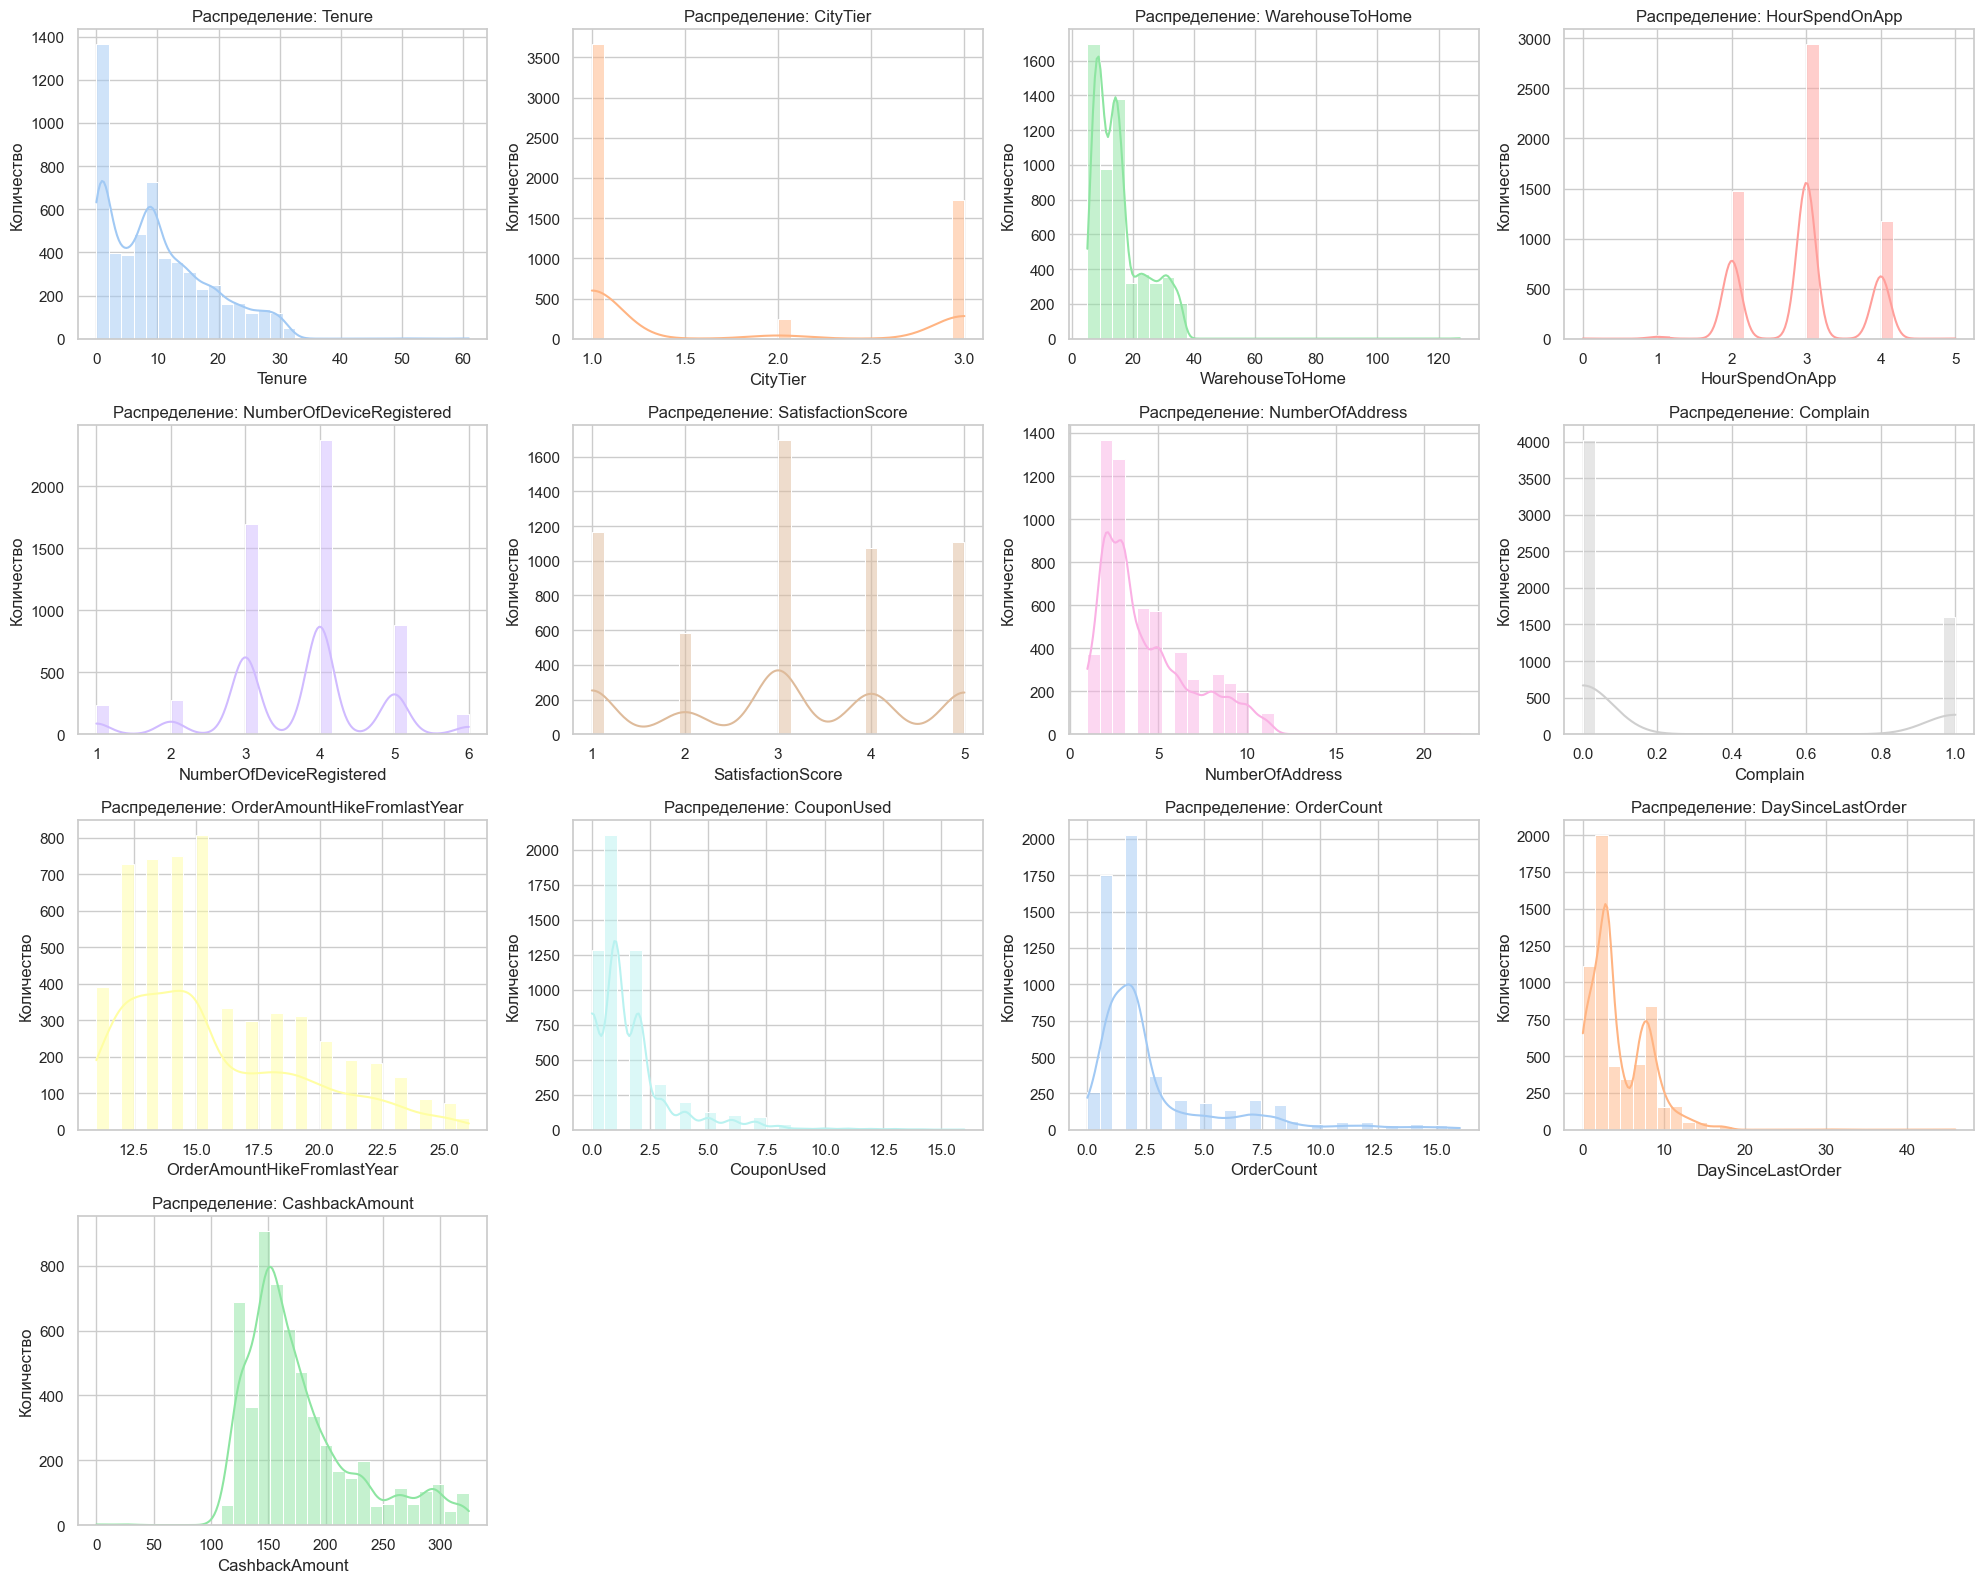

In [103]:
# Анализ распределений признаков
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style='whitegrid')

# Выбираем числовых признаков
num_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['CustomerID', 'Churn']).columns.tolist()

n_cols = 4 # количество колонок 
n_rows = math.ceil(len(num_cols) / n_cols) # определяем количество строк

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

colors = sns.color_palette('pastel', len(num_cols))

# Строим гистограмы
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color=colors[i-1])
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')

plt.tight_layout()
plt.show()

##### Выводы по распределениям:
Большинство признаков имеют скошенные распределения (правый хвост), что типично для данных о клиентах (например, мало кто тратит много времени в приложении или использует много купонов). Это может указывать на необходимость нормализации данных перед обучением модели.

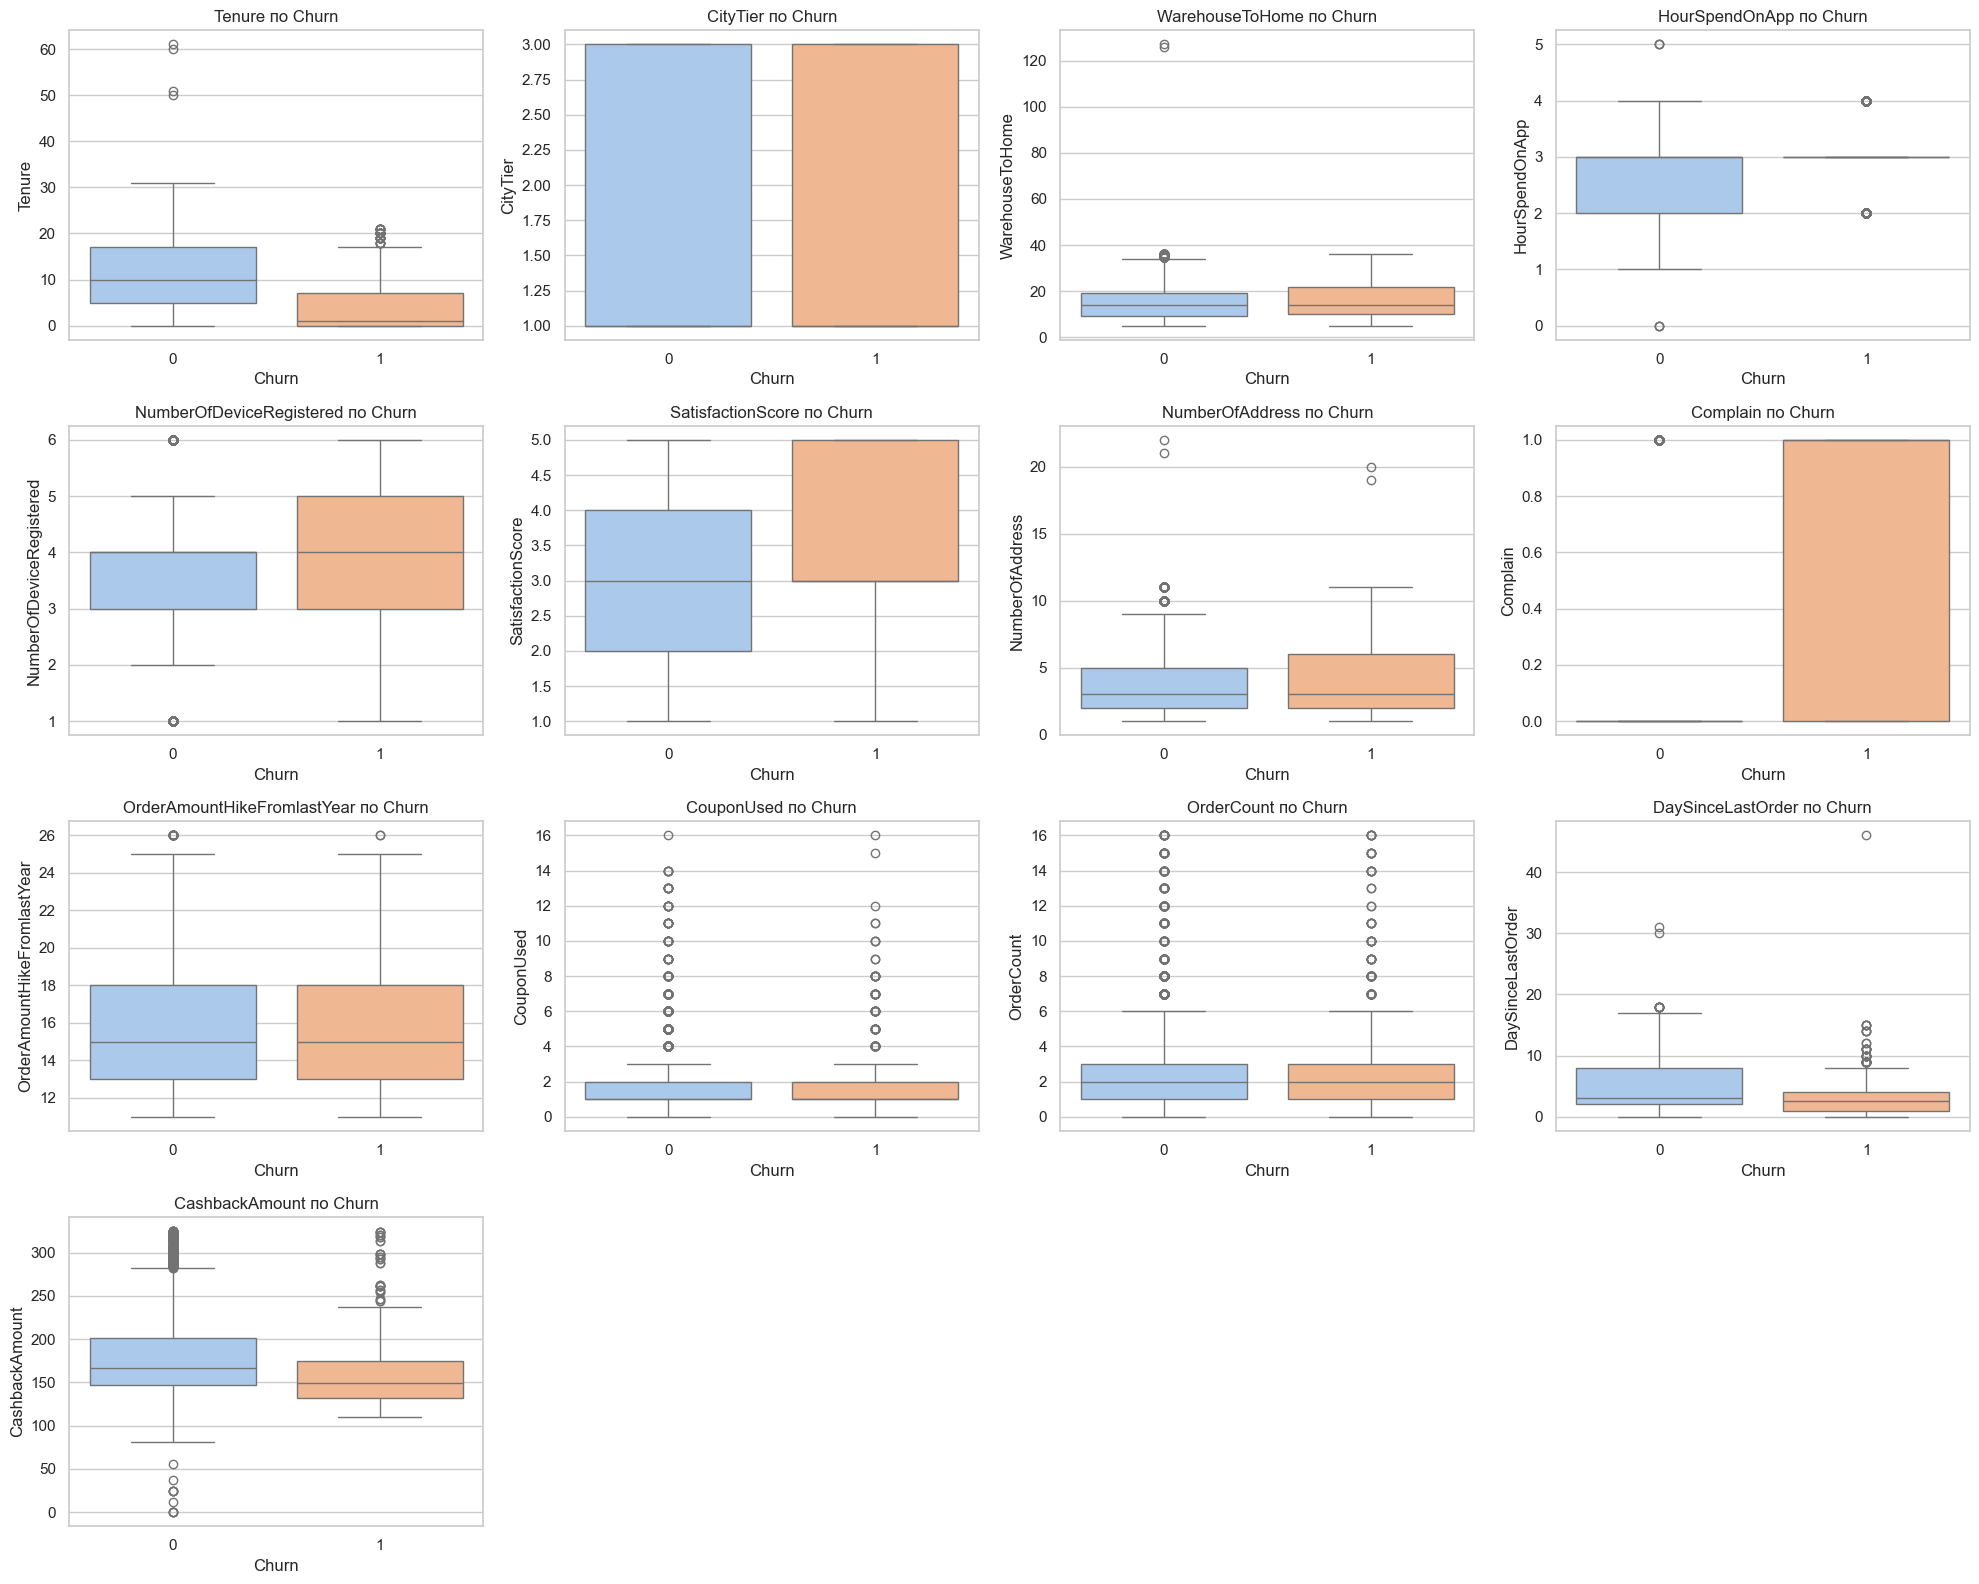

In [104]:
# Исследование зависимости признаков от Churn 
# Для числовых признаков

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'{col} по Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### Выводы:
Клиенты с оттоком (Churn = 1) чаще имеют более низкие показатели удовлетворенности, меньшую активность (меньше часов в приложении, меньше заказов, больший перерыв с последнего заказа), а также больше жалуются.

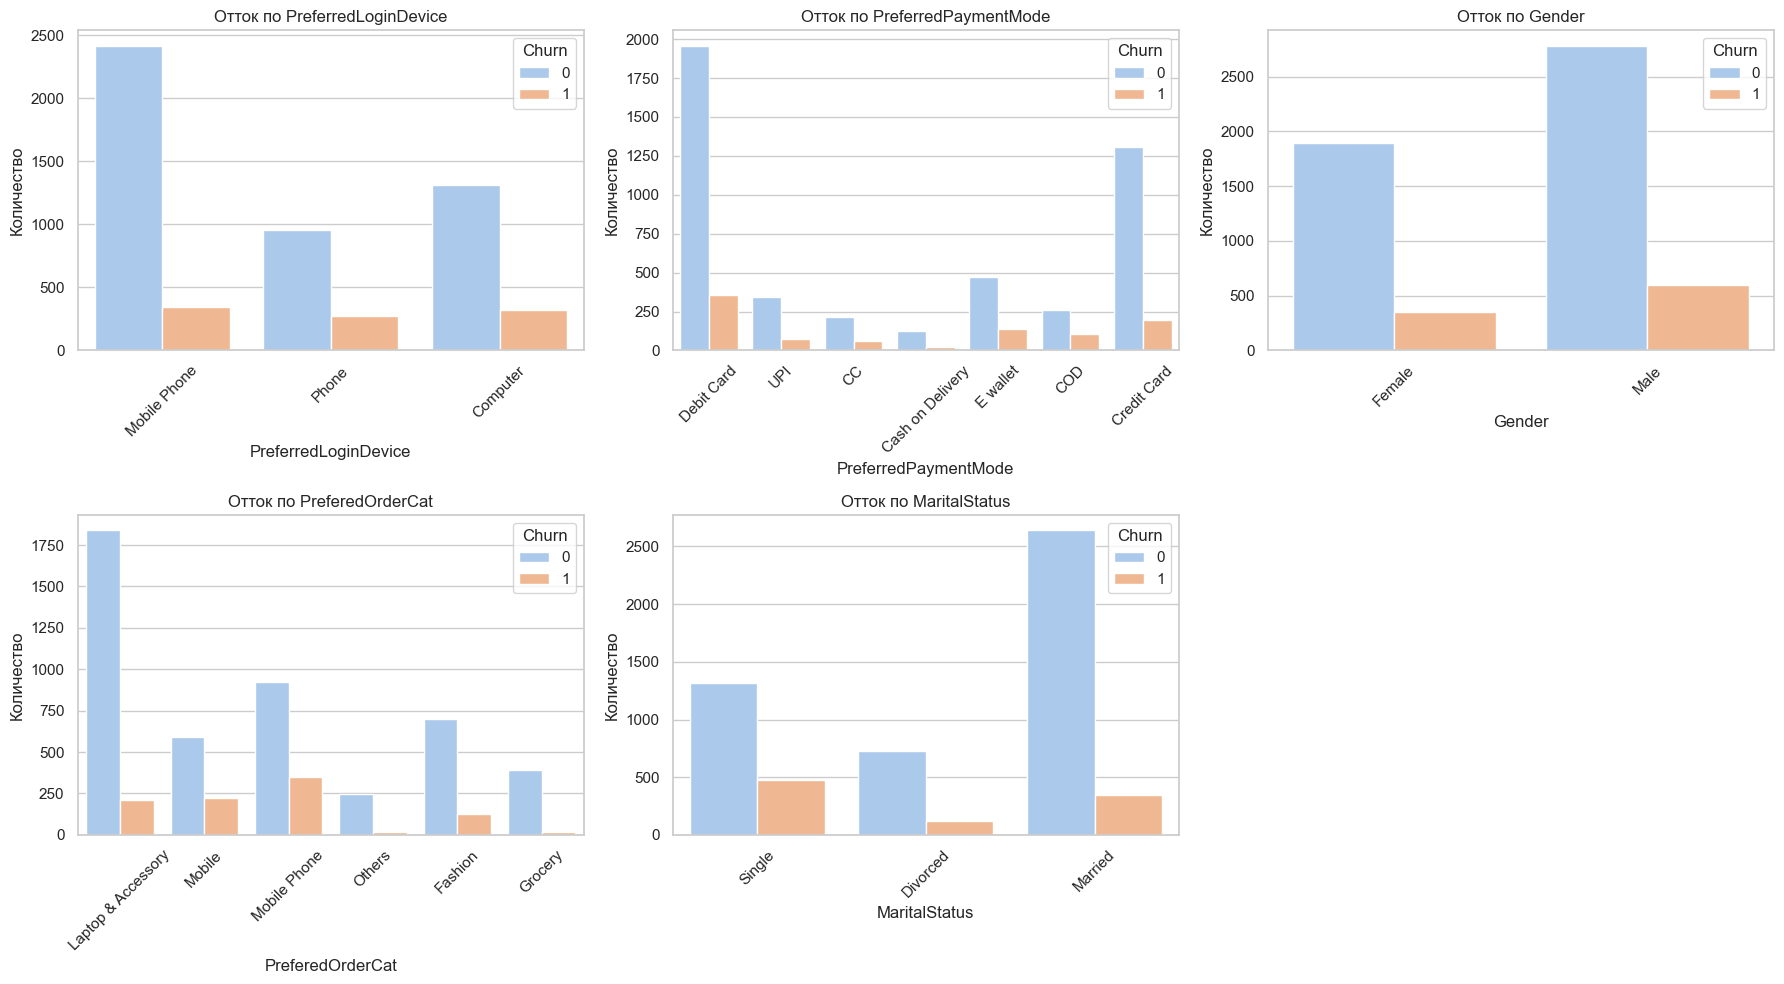

In [105]:
# Исследование зависимости признаков от Churn 
# Для категориальных признаков

cat_cols = df.select_dtypes(include='object').columns.tolist()

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue='Churn', data=df, palette='pastel')
    plt.title(f'Отток по {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Выводы:
Во всех категориях клиенты без оттока (Churn = 0) значительно преобладают над клиентами с оттоком (Churn = 1).

Наиболее популярные предпочтения: вход через Mobile Phone, оплата через Debit Card, категория Laptop & Accessory, семейное положение Single.

Мужчин больше, чем женщин, но пропорции оттока схожи.

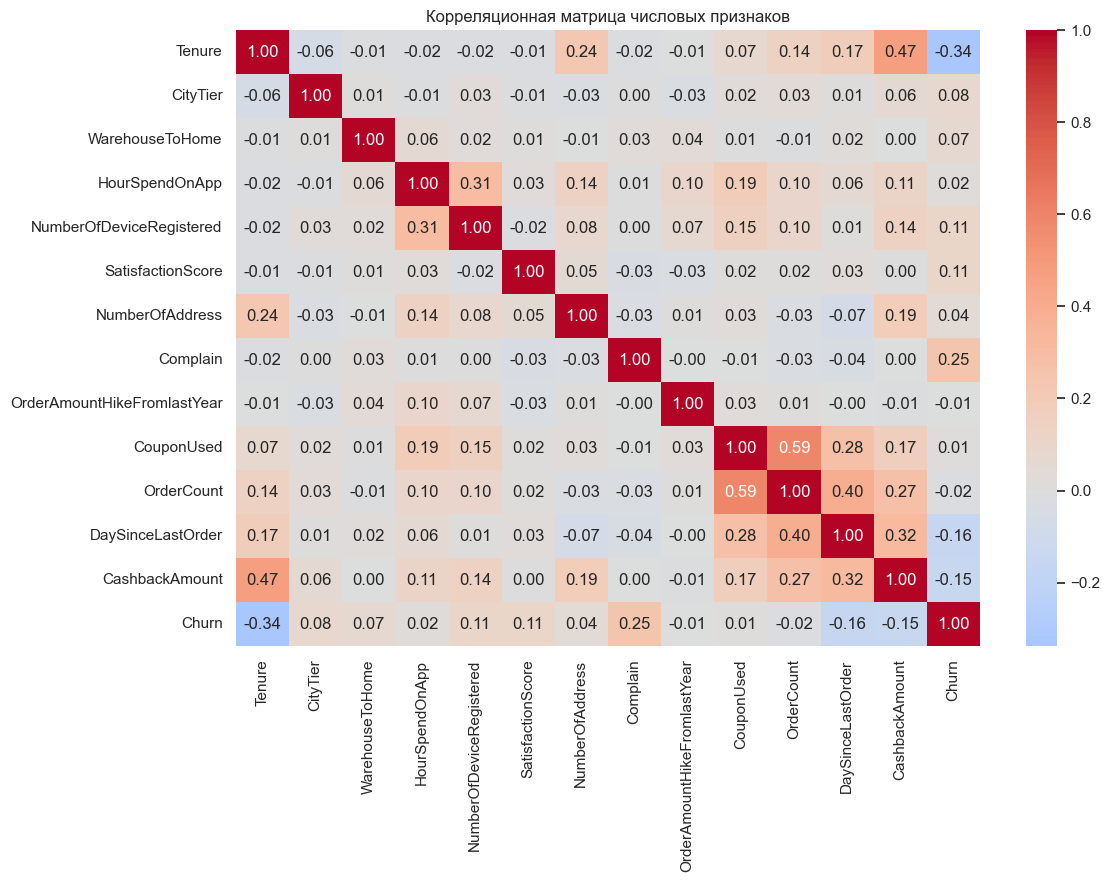

In [106]:
# Корреляционный анализ:
corr = df[num_cols + ['Churn']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

#### Выводы:
Отток (Churn) наиболее связан с жалобами (Complain) и меньшим стажем (Tenure), а также с меньшей активностью (DaySinceLastOrder, CashbackAmount).

Некоторые признаки, такие как количество заказов (OrderCount) и использование купонов (CouponUsed), сильно связаны между собой, что логично: больше заказов — больше купонов.

Признаки, такие как уровень города (CityTier) или расстояние от склада (WarehouseToHome), почти не влияют на другие переменные и отток.

### Шаг 3: Модели

In [107]:
df['Gender'] = df['Gender'].map({'Female' : 0, 'Male': 1})
df['Gender'].value_counts()

Gender
1    3384
0    2246
Name: count, dtype: int64

#### В качестве бейслайн моделя используем KNN

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Разделяем данных на X и y
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Создаем копии 
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Target Mean Encoding с сглаживанием
global_mean = y_train.mean()
alpha = 10 # сглаживание

for col in cat_cols:
    stats = (
        pd.DataFrame({'mean' : y_train.groupby(X_train[col]).mean(),
                      'count' : y_train.groupby(X_train[col]).count()})
    )
    stats['smooth'] = (stats['mean'] * stats['count'] + global_mean * alpha) / (stats['count'] + alpha)

    mapping = stats['smooth'].to_dict()

    X_train_enc[col] = X_train[col].map(mapping)
    X_test_enc[col] = X_test[col].map(mapping)

    # Заполняем пропуски в test с глобальным среднем
    X_test_enc[col].fillna(global_mean, inplace=True)

# Масштабируем числовых данных
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

# Заполняем пропуски средними значениями
X_train_enc.fillna(X_train_enc.mean(), inplace=True)
X_test_enc.fillna(X_train_enc.mean(), inplace=True)

# Обучим модель KNN в качестве бейслайна
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_enc, y_train)
y_pred_train = knn.predict(X_train_enc)
y_pred_test = knn.predict(X_test_enc)

# Создаем датафрейм с метриками
metrics_baseline = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
    'Precision' : [precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)],
    'Recall' : [recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)],
    'F1-score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)]
}, index=['Train', 'Test'])

metrics_baseline

,Accuracy,Precision,Recall,F1-score
Train,0.938943,0.883943,0.733509,0.801730
Test,0.902309,0.785714,0.578947,0.666667


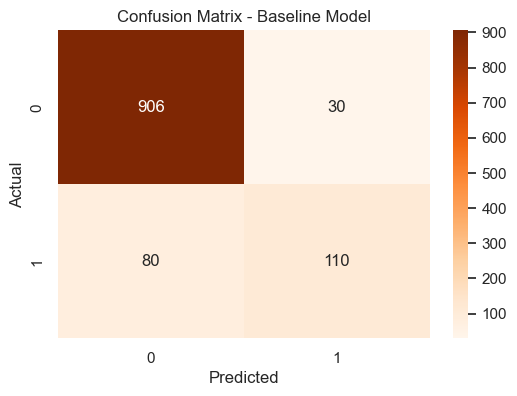

In [156]:
# Выводим матрицу ошибок для KNN
from sklearn.metrics import confusion_matrix

cm_baseline_model = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_baseline_model, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Логистическая регрессия

In [113]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_enc, y_train)

y_pred_train_logreg = logreg.predict(X_train_enc)
y_pred_test_logreg = logreg.predict(X_test_enc)

y_proba_log = logreg.predict_proba(X_test_enc)[:, 1]

metrics_logreg = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_test, y_pred_test_logreg)],
    'Precision' : [precision_score(y_train, y_pred_train_logreg), precision_score(y_test, y_pred_test_logreg)],
    'Recall' : [recall_score(y_train, y_pred_train_logreg), recall_score(y_test, y_pred_test_logreg)],
    'F1-score' : [f1_score(y_train, y_pred_train_logreg), f1_score(y_test, y_pred_test_logreg)]
}, index=['Train', 'Test'])

metrics_logreg

,Accuracy,Precision,Recall,F1-score
Train,0.885879,0.754167,0.477573,0.584814
Test,0.881883,0.739496,0.463158,0.569579


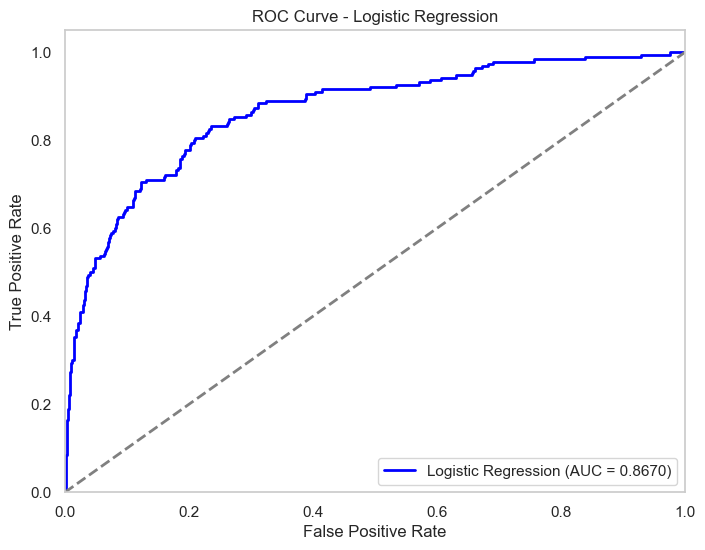

In [127]:
from sklearn.metrics import roc_curve, auc

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc_logreg = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()

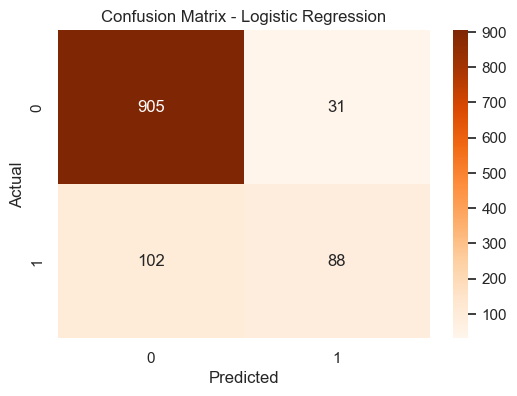

In [155]:
# Выводим матрицу ошибок для Logistic Regression

cm_logreg = confusion_matrix(y_test, y_pred_test_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_enc, y_train)

y_pred_train_dt = dt.predict(X_train_enc)
y_pred_test_dt = dt.predict(X_test_enc)

metrics_dt = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train_dt), accuracy_score(y_test, y_pred_test_dt)],
    'Precision' : [precision_score(y_train, y_pred_train_dt), precision_score(y_test, y_pred_test_dt)],
    'Recall' : [recall_score(y_train, y_pred_train_dt), recall_score(y_test, y_pred_test_dt)],
    'F1-score' : [f1_score(y_train, y_pred_train_dt), f1_score(y_test, y_pred_test_dt)]
}, index=['Train', 'Test'])

metrics_dt

,Accuracy,Precision,Recall,F1-score
Train,1.000000,1.000000,1.0,1.000000
Test,0.969805,0.919355,0.9,0.909574


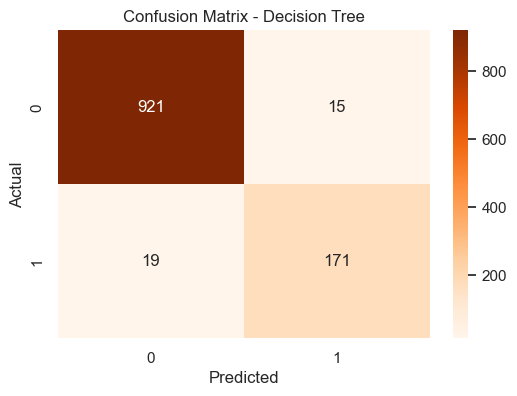

In [154]:
# Выводим матрицу ошибок для Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_test_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_enc, y_train)

y_pred_train_rf = rf.predict(X_train_enc)
y_pred_test_rf = rf.predict(X_test_enc)

metrics_rf = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_test, y_pred_test_rf)],
    'Precision' : [precision_score(y_train, y_pred_train_rf), precision_score(y_test, y_pred_test_rf)],
    'Recall' : [recall_score(y_train, y_pred_train_rf), recall_score(y_test, y_pred_test_rf)],
    'F1-score' : [f1_score(y_train, y_pred_train_rf), f1_score(y_test, y_pred_test_rf)]
}, index=['Train', 'Test'])

metrics_rf

,Accuracy,Precision,Recall,F1-score
Train,1.000000,1.000000,1.000000,1.000000
Test,0.984014,0.983146,0.921053,0.951087


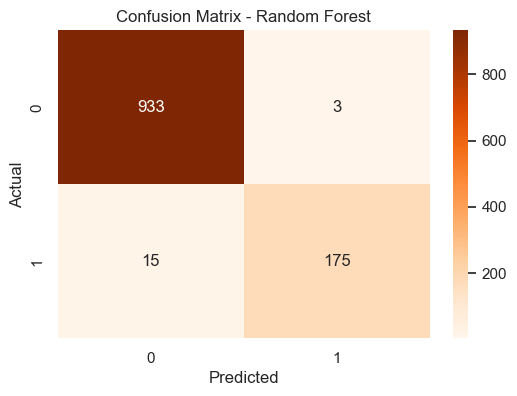

In [153]:
# Выводим матрицу ошибок для RandomForest

cm_rf = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost

In [134]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)
xgb.fit(X_train_enc, y_train)

y_pred_train_xgb = xgb.predict(X_train_enc)
y_pred_test_xgb = xgb.predict(X_test_enc)

metrics_xgb = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train_xgb), accuracy_score(y_test, y_pred_test_xgb)],
    'Precision' : [precision_score(y_train, y_pred_train_xgb), precision_score(y_test, y_pred_test_xgb)],
    'Recall' : [recall_score(y_train, y_pred_train_xgb), recall_score(y_test, y_pred_test_xgb)],
    'F1-score' : [f1_score(y_train, y_pred_train_xgb), f1_score(y_test, y_pred_test_xgb)]
}, index=['Train', 'Test'])

metrics_xgb

,Accuracy,Precision,Recall,F1-score
Train,1.000000,1.000000,1.000000,1.000000
Test,0.992895,0.984043,0.973684,0.978836


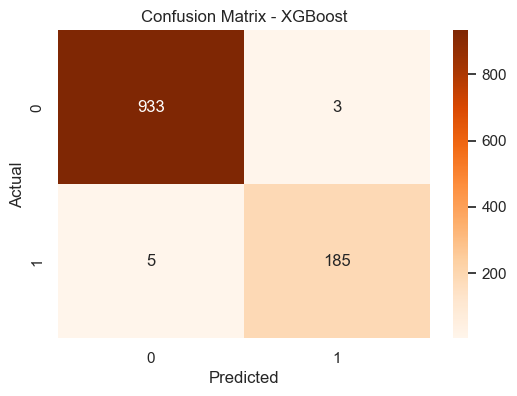

In [150]:
# Выводим матрицу ошибок для XGBoost

cm_xgboost = confusion_matrix(y_test, y_pred_test_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Catboost

In [136]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train_enc, y_train)

y_pred_train_catboost = catboost.predict(X_train_enc)
y_pred_test_catboost = catboost.predict(X_test_enc)

metrics_catboost = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train_catboost), accuracy_score(y_test, y_pred_test_catboost)],
    'Precision' : [precision_score(y_train, y_pred_train_catboost), precision_score(y_test, y_pred_test_catboost)],
    'Recall' : [recall_score(y_train, y_pred_train_catboost), recall_score(y_test, y_pred_test_catboost)],
    'F1-score' : [f1_score(y_train, y_pred_train_catboost), f1_score(y_test, y_pred_test_catboost)]
}, index=['Train', 'Test'])

metrics_catboost

,Accuracy,Precision,Recall,F1-score
Train,0.990231,0.989041,0.952507,0.970430
Test,0.968028,0.963855,0.842105,0.898876


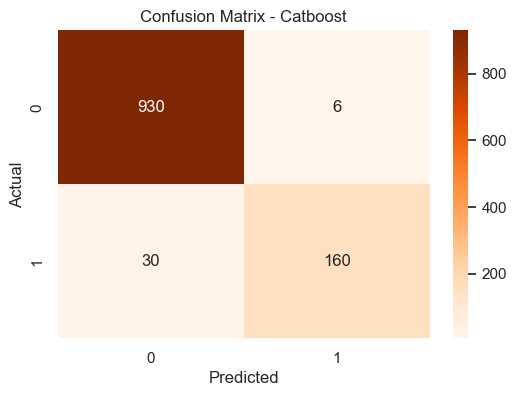

In [151]:
# Выводим матрицу ошибок для Catboost

cm_catboost = confusion_matrix(y_test, y_pred_test_catboost)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Catboost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [137]:
# Собираем все метрики для тестовой выборки
comparison_df = pd.DataFrame({
    'Baseline': metrics_baseline.loc['Test'],
    'Logistic Regression': metrics_logreg.loc['Test'],
    'Decision Tree': metrics_dt.loc['Test'],
    'Random Forest': metrics_rf.loc['Test'],
    'XGBoost': metrics_xgb.loc['Test'],
    'CatBoost': metrics_catboost.loc['Test']
}).T  # транспонируем чтобы модели были строками

comparison_df

,Accuracy,Precision,Recall,F1-score
Baseline,0.902309,0.785714,0.578947,0.666667
Logistic Regression,0.881883,0.739496,0.463158,0.569579
Decision Tree,0.969805,0.919355,0.900000,0.909574
Random Forest,0.984014,0.983146,0.921053,0.951087
XGBoost,0.992895,0.984043,0.973684,0.978836
CatBoost,0.968028,0.963855,0.842105,0.898876


##### XGBoost однозначно показывает лучшие результаты по всем метрикам. Она превосходит и простых моделей таких как (LogReg, KNN) и сложных моделей таких как (RF, Catboost). Я выбираю XGBoost в качестве финальной модели и подбираю гиперпараметров

### Подбор гиперпараметров

In [139]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dict = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [3, 5, 8, 10],
    'learning_rate' : [0.01, 0.05, 0.1],
    'reg_lambda' : [0, 1, 5, 10]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dict,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_enc, y_train)

print("Лучшие параметры:", random_search.best_params_)
print("Лучший ROC_AUC на кросс-валидации:", random_search.best_score_)

Лучшие параметры: {'reg_lambda': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}
Лучший ROC_AUC на кросс-валидации: 0.9620249730794689


In [140]:
best_xgb = random_search.best_estimator_

y_pred_train_best = best_xgb.predict(X_train_enc)
y_pred_test_best = best_xgb.predict(X_test_enc)

metrics_best = pd.DataFrame({
    'Accuracy' : [accuracy_score(y_train, y_pred_train_best), accuracy_score(y_test, y_pred_test_best)],
    'Precision' : [precision_score(y_train, y_pred_train_best), precision_score(y_test, y_pred_test_best)],
    'Recall' : [recall_score(y_train, y_pred_train_best), recall_score(y_test, y_pred_test_best)],
    'F1-score' : [f1_score(y_train, y_pred_train_best), f1_score(y_test, y_pred_test_best)]
}, index=['Train', 'Test'])

metrics_best

,Accuracy,Precision,Recall,F1-score
Train,1.000000,1.000000,1.000000,1.000000
Test,0.991119,0.978723,0.968421,0.973545


#### Вывод:
Модель идеально обучилась на тренировочной выборке — все метрики равны 1.

При этом на тестовой выборке модель показала очень высокие результаты, что говорит об отсутствии переобучения, несмотря на идеально высокие значения на train.

Все тестовые метрики выше 0.96, что считается отличным качеством.

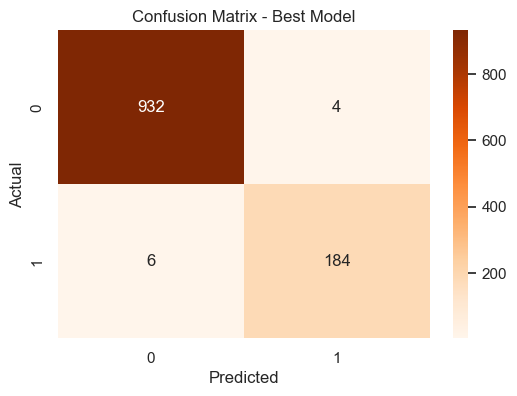

In [147]:
# Выводим матрицу ошибок
from sklearn.metrics import confusion_matrix

cm_best_xgb = confusion_matrix(y_test, y_pred_test_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Вывод:
Модель допускает минимальное количество ошибок:

Очень мало ложных тревог (FP) и пропущенных (FN).

In [162]:
# Проведем кросс валидацию 
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Оцениваем метрики
cv_accuracy = cross_val_score(best_xgb, X_train_enc, y_train, cv=cv, scoring='accuracy')
print(f'Accuracy: {cv_accuracy} - Mean Accuracy: {cv_accuracy.mean()}')

cv_f1 = cross_val_score(best_xgb, X_train_enc, y_train, cv=cv, scoring='f1')
print(f'F1-score: {cv_f1} - Mean F1-score: {cv_f1.mean()}')

Accuracy: [0.96448391 0.96226415 0.95116537 0.95782464 0.95222222] - Mean Accuracy: 0.9575920582069305
F1-score: [0.88965517 0.88356164 0.83941606 0.86713287 0.84912281] - Mean F1-score: 0.8657777097587962


#### Вывод:
На различных подвыборках модель стабильно держит высокий результат и это означает что модель не переобучается

#### Общий вывод:
Модель XGBoost показывает высокое качество на тесте, устойчива по кросс валидации и низкая ошибка по матрице ошибок.

Модель находит большинство положительных объектов 

Дает мало ложных срабатываний

Устойчиво работает на разных подвиборках

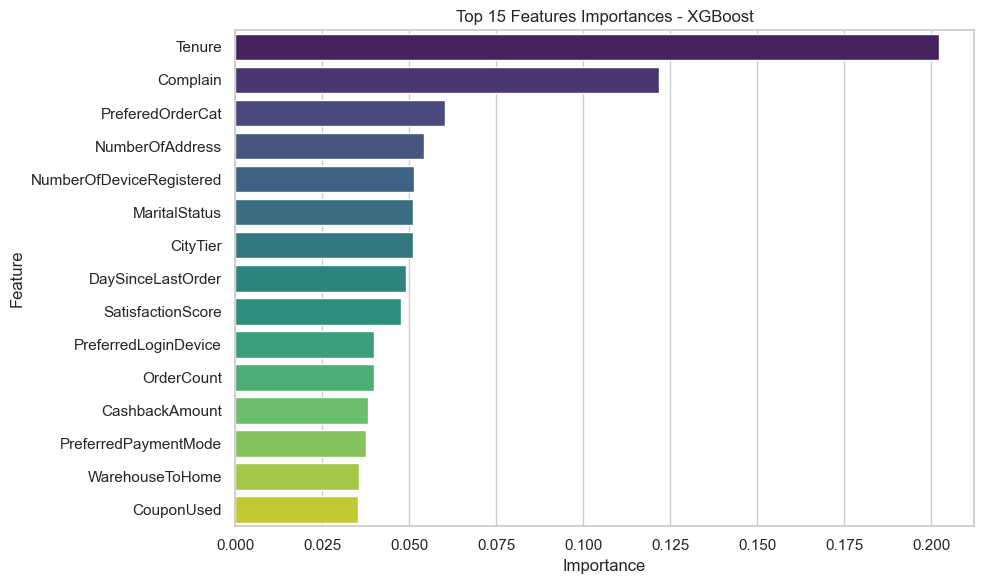

In [166]:
# Проверяем важность признаков

feature_importance = best_xgb.feature_importances_
feature_names = X_train_enc.columns

importance_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Features Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

 99%|===================| 1117/1126 [01:28<00:00]        

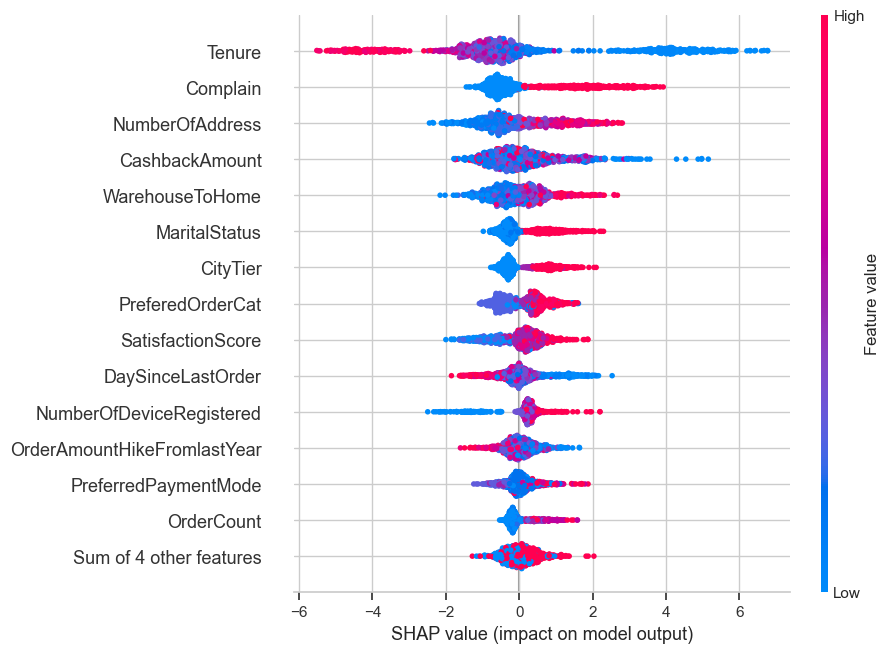

In [168]:
# Выводим важность признаков с помощью SHAP
import shap

explainer = shap.Explainer(best_xgb, X_train_enc)
shap_values = explainer(X_test_enc)

shap.plots.beeswarm(shap_values, max_display=15)

### Шаг 4: Выводы и рекомендации:

## Какие признаки наиболее сильно влияют на отток?

На основе анализа важности признаков с использованием XGBoost и SHAP-значений, можно выделить следующие ключевые факторы, оказывающие наибольшее влияние на отток клиентов:

- **Tenure (стаж клиента)**  
  - **Анализ**: Согласно SHAP-значениям, низкий стаж (синие точки) увеличивает вероятность оттока, в то время как высокий стаж (красные точки) снижает. Это подтверждается высоким значением важности в XGBoost.  
  - **Вывод**: Новые клиенты с коротким стажем более склонны уходить.

- **Complain (жалобы)**  
  - **Анализ**: SHAP показывает, что наличие жалоб (красные точки) сильно увеличивает вероятность оттока (до 4), что делает этот признак вторым по важности в XGBoost.  
  - **Вывод**: Жалобы являются ключевым индикатором недовольства и оттока.

- **DaySinceLastOrder (дни с последнего заказа)**  
  - **Анализ**: Высокие значения (красные точки) в SHAP-анализе положительно влияют на отток (до 2), что соответствует значению важности в XGBoost.  
  - **Вывод**: Долгое отсутствие заказов значительно повышает риск оттока.

- **SatisfactionScore (удовлетворенность)**  
  - **Анализ**: SHAP демонстрирует, что низкие значения (синие точки) увеличивают отток, а высокие (красные) — снижают. Это тоже подтверждает XGBoost.  
  - **Вывод**: Низкая удовлетворенность клиентов — важный фактор оттока.

- **WarehouseToHome (расстояние от склада)**  
  - **Анализ**: Высокие значения (красные точки) в SHAP увеличивают вероятность оттока. 
  - **Вывод**: Долгие доставки из-за расстояния влияют на уход клиентов.

## Какие сегменты клиентов наиболее подвержены уходу?

На основе SHAP-значений и важности признаков можно выделить следующие сегменты клиентов с высоким риском оттока:

- **Новые клиенты (низкий Tenure)**  
  - **Анализ**: Клиенты с низким стажем чаще уходят, так как еще не сформировали лояльность. SHAP показывает, что низкий стаж (синие точки) увеличивает вероятность оттока.  
  - **Вывод**: Новые клиенты с коротким стажем представляют группу высокого риска.

- **Клиенты с жалобами (Complain > 0)**  
  - **Анализ**: Согласно по график важности признаков и SHAP, клиенты с жалобами имеют значительно более высокую вероятность оттока. SHAP выделяет высокие значения (красные точки) как сильный положительный фактор оттока.  
  - **Вывод**: Клиенты, подающие жалобы, крайне склонны к уходу.

- **Клиенты с низкой удовлетворенностью (SatisfactionScore < 3)**  
  - **Анализ**: Boxplot показывает, что медиана удовлетворенности для ушедших клиентов ниже (около 2), что подтверждается SHAP, где низкие значения (синие точки) увеличивают отток.  
  - **Вывод**: Клиенты с низкой удовлетворенностью — уязвимая группа.

- **Клиенты с долгим отсутствием заказов (DaySinceLastOrder > 5)**  
  - **Анализ**: Гистограммы и SHAP указывают, что клиенты, не делавшие заказы более 5-10 дней, склонны уходить. SHAP показывает, что высокие значения (красные точки) положительно влияют на отток.  
  - **Вывод**: Долгое отсутствие активности сильно повышает риск оттока.

- **Клиенты, живущие далеко от склада (WarehouseToHome > 15)**  
  - **Анализ**: Boxplot и SHAP показывают, что клиенты с большим расстоянием (медиана ~15 для Churn=1) чаще уходят, вероятно, из-за длительных доставок. Высокие значения (красные точки) увеличивают отток.  
  - **Вывод**: Клиенты из удаленных регионов склонны к оттоку.

## Что вы предлагаете изменить в продукте/бизнесе, чтобы сократить отток?

На основе выявленных факторов и сегментов, вот рекомендации для бизнеса X Retail, направленные на снижение оттока клиентов:

- **Улучшение качества обслуживания**  
  - **Цель**: Снизить уровень **Complain (Жалобы)** и повысить **SatisfactionScore (удовлетворенность)**.  
  - **Действие**: Внедрить систему быстрого реагирования на жалобы (например, чат-боты или выделенная поддержка) и проводить регулярные опросы для сбора обратной связи и улучшения клиентского опыта. Создать команду для анализа жалоб и внедрения улучшений на основе полученных данных.  
  - **Ожидаемый эффект**: Уменьшение числа жалоб и повышение удовлетворенности клиентов, что снизит вероятность их ухода.

- **Повышение вовлеченности клиентов**  
  - **Цель**: Уменьшить **DaySinceLastOrder (дни с последнего заказа)** и увеличить **OrderCount (количество заказов)**.  
  - **Действие**: Отправлять персонализированные напоминания и скидки клиентам, не делавшим заказы более 5 дней. Разработать систему уведомлений (email, push-уведомления) с предложениями, основанными на предпочтениях клиентов (**PreferedOrderCat (предпочитаемая категория заказов)**).  
  - **Ожидаемый эффект**: Повышение активности клиентов и снижение риска оттока за счет возвращения к покупкам.

- **Работа с новыми клиентами**  
  - **Цель**: Увеличить лояльность клиентов с низким **Tenure (стаж)**.  
  - **Действие**: Предложить программы приветственных бонусов (например, скидка 10% на первый заказ). Создать обучающий туториал в приложении и разослать новичкам персонализированные предложения.  
  - **Ожидаемый эффект**: Формирование лояльности у новых клиентов и снижение их оттока.

- **Оптимизация логистики**  
  - **Цель**: Сократить влияние **WarehouseToHome (расстояние от склада до дома)** на отток.  
  - **Действие**: Оптимизировать маршруты доставки для клиентов, живущих далеко от складов, или рассмотреть открытие новых складов в регионах. Провести анализ географии клиентов и инвестировать в логистику в проблемных зонах.  
  - **Ожидаемый эффект**: Сокращение времени доставки и снижение оттока из-за логистических проблем.